In [51]:
import pandas as pd
import numpy as np
import math
from mpmath import gamma

In [9]:
df = pd.read_excel('est earnings 29 Sep 2020 - 29 Sep 2023/report.xlsx')

/home/ashish/anaconda3/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [10]:
df

,Date,Estimated earnings (USD),Page views,Page RPM (USD),Impressions,Impression RPM (USD),Active View Viewable,Clicks
0,2020-09-29,0.18,238,0.74,514,0.34,0.4669,3
1,2020-09-30,0.03,127,0.26,287,0.11,0.4618,1
2,2020-10-01,0.16,150,1.04,341,0.46,0.3697,3
3,2020-10-02,0.29,412,0.70,1027,0.28,0.4543,5
4,2020-10-03,0.21,367,0.58,1043,0.21,0.4287,4
...,...,...,...,...,...,...,...,...
1091,2023-09-25,0.13,25,5.29,84,1.58,0.5238,1
1092,2023-09-26,0.02,75,0.27,278,0.07,0.5458,1
1093,2023-09-27,0.02,46,0.41,145,0.13,0.4255,0
1094,2023-09-28,0.00,29,0.14,87,0.05,0.4023,0


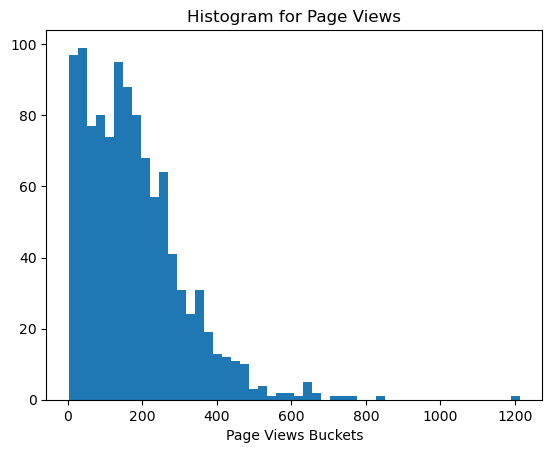

In [36]:
import matplotlib.pyplot as plt

# x = np.random.normal(170, 10, 250)

plt.title("Histogram for Page Views")
plt.xlabel("Page Views Buckets")
plt.hist(df['Page views'], bins=50)
plt.show() 

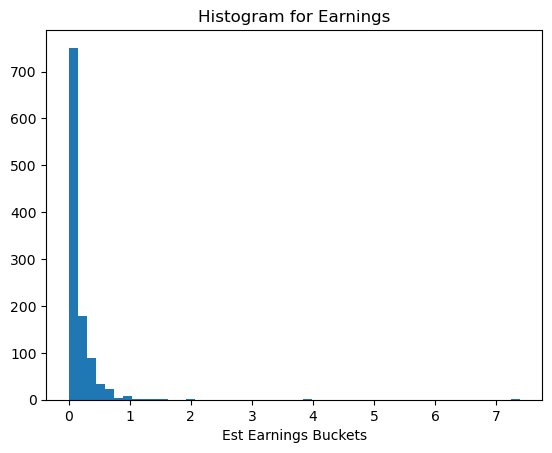

In [73]:
plt.title("Histogram for Earnings")
plt.xlabel("Est Earnings Buckets")
plt.hist(df['Estimated earnings (USD)'], bins = 50)
plt.show() 

In [38]:
import math

lm = df['Page views'].mean()
print(lm)
k_list = [25, 50, 75, 100, 125, 150, 175]

def get_poisson_probability(lm, k):
    ret = math.pow(lm, k) * math.pow(math.e, -lm) / math.factorial(k)
    return ret
for i in k_list:
    print(str(i) + " " + str(get_poisson_probability(lm, i)))

177.1934306569343
25 1.1652405062589648e-46
50 9.664442254115404e-30
75 1.9267721475046397e-18
100 8.329690116608149e-11
125 6.715016091645201e-06


OverflowError: math range error

In [41]:
lm = df['Estimated earnings (USD)'].mean()
print(lm)
k_list = np.linspace(0, 1, num=10)

def get_poisson_probability(lm, k):
    ret = math.pow(lm, k) * math.pow(math.e, -lm) / math.factorial(k)
    return ret
for i in k_list:
    print(str(i) + " " + str(get_poisson_probability(lm, i)))

0.14753649635036475
0.0 0.8628309475661622


/tmp/ipykernel_20705/1462055857.py:6: DeprecationWarning: Using factorial() with floats is deprecated
  ret = math.pow(lm, k) * math.pow(math.e, -lm) / math.factorial(k)


ValueError: factorial() only accepts integral values

In [74]:
lm = df['Estimated earnings (USD)'].mean()
print("lambda: " + str(lm))
k_list = np.linspace(0.1, 1.5, num=15)


def get_poisson_probability(lm, k):
    ret = math.pow(lm, k) * math.pow(math.e, -lm) / float(gamma(k))
    return ret

kl = []
pl = []

kl.append(0)
pl.append(math.pow(lm, 0) * math.pow(math.e, -lm) / float(math.factorial(0)))

for i in k_list:
    kl.append(round(i, 2))
    pl.append(get_poisson_probability(lm, i))

df_report = pd.DataFrame({
    'k': kl,
    'probability': pl
})

df_report

lambda: 0.14753649635036475


,k,probability
0,0.0,0.862831
1,0.1,0.074899
2,0.2,0.128178
3,0.3,0.162441
4,0.4,0.180923
5,0.5,0.186982
6,0.6,0.183787
7,0.7,0.174125
8,0.8,0.160327
9,0.9,0.144248


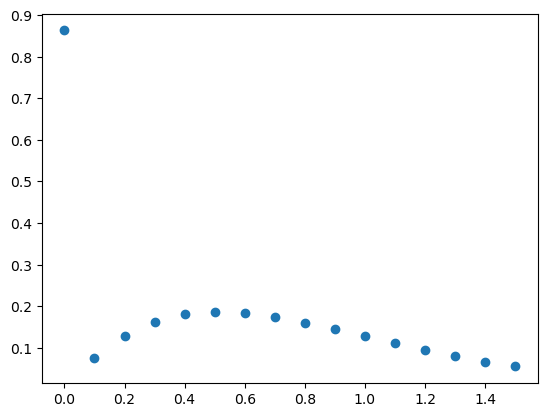

In [75]:
plt.scatter(df_report['k'], df_report['probability'])
plt.show()

In [77]:
lm = df['Estimated earnings (USD)'].mean()
print("lambda: " + str(lm))
k_list = np.linspace(0.05, 1.5, num=30)


def get_poisson_probability(lm, k):
    ret = math.pow(lm, k) * math.pow(math.e, -lm) / float(gamma(k))
    return ret

kl = []
pl = []

kl.append(0)
pl.append(math.pow(lm, 0) * math.pow(math.e, -lm) / float(math.factorial(0)))

for i in k_list:
    kl.append(round(i, 2))
    pl.append(get_poisson_probability(lm, i))

df_report = pd.DataFrame({
    'k': kl,
    'probability': pl
})

df_report

lambda: 0.14753649635036475


,k,probability
0,0.00,0.862831
1,0.05,0.040272
2,0.10,0.074899
3,0.15,0.104100
4,0.20,0.128178
5,0.25,0.147492
6,0.30,0.162441
7,0.35,0.173443
8,0.40,0.180923
9,0.45,0.185300


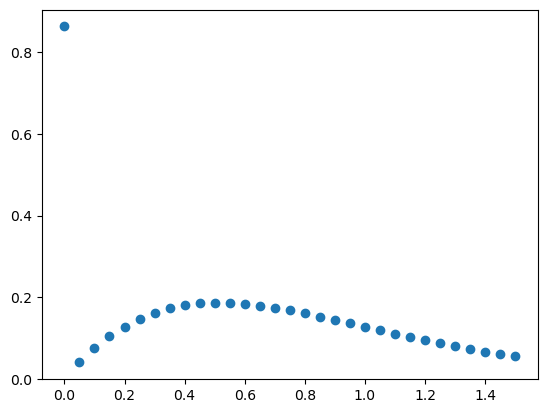

In [78]:
plt.scatter(df_report['k'], df_report['probability'])
plt.show()